# **CNN Model for [MNIST dataset:](https://www.tensorflow.org/datasets/catalog/mnist)**

- MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.
- MNIST is short for Modified National Institute of Standards and Technology database.
- MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

In [ ]:
# importing libraries
import keras
from keras.datasets import mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load pre-shuffled MNIST data into train and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


## **Data Format**:
- We can see that there are 60k images in the training set and 10k images in the testing set.

- The dimension of our training vector is (60000, 28, 28), this is because there are 60,000 grayscale images with the dimension 28X28.

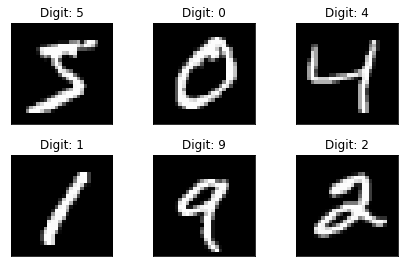

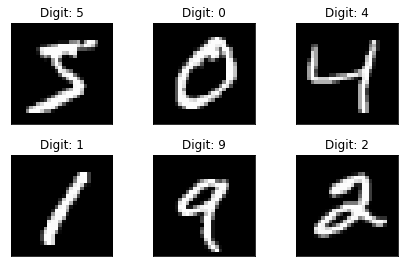

In [ ]:
# Plotting the MNIST dataset using matplotlib
%matplotlib inline
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

## **Preprocessing Data**:
- We can normalize the x_train and x_test data by dividing it by 255.
- There are two ways to represent the image data as a three dimensional array. The first involves having the channels as the last or third dimension in the array. This is called “channels last“. The second involves having the channels as the first dimension in the array, called “channels first“.

    - Channels Last. Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].
    - Channels First. Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].
- We set channels to 1 for grayscale images as grayscale simplifies the algorithm and reduces computational requirements.

In [ ]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#### Since the output of the model can comprise any of the digits between 0 to 9. so, we need 10 classes in output. To make output for 10 classes, we use `keras.utils.to_categorical` function, which will provide the 10 columns. Out of these 10 columns, only one value will be one and the rest 9 will be zero and this one value of the output will denote the class of the digit.
> ### For example, 3 is represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

## **Creating CNN Model**
- Our convolutional layers will have 64 neurons (feature maps) and a 3x3 feature detector. In turn, our pooling layers will use max pooling with a 2x2 matrix. 
- Convolutional neural networks are almost always proceeded by an artificial neural network. In Keras, a Dense layer implements the operation output = activation(dot(input, weight) + bias). The input to our artificial neural network must be in one dimension therefore we flatten it beforehand.

In [ ]:

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model_log = model.fit(x_train, y_train_one_hot, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 101s 106ms/step - loss: 0.1436 - accuracy: 0.9568
Epoch 2/10
938/938 [==============================] - 83s 89ms/step - loss: 0.0495 - accuracy: 0.9849
Epoch 3/10
938/938 [==============================] - 81s 87ms/step - loss: 0.0374 - accuracy: 0.9879
Epoch 4/10
938/938 [==============================] - 82s 88ms/step - loss: 0.0286 - accuracy: 0.9909
Epoch 5/10
938/938 [==============================] - 81s 86ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 6/10
938/938 [==============================] - 81s 86ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 7/10
938/938 [==============================] - 79s 84ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 8/10
938/938 [==============================] - 80s 85ms/step - loss: 0.0118 - accuracy: 0.9960
Epoch 9/10
938/938 [==============================] - 81s 86ms/step - loss: 0.0113 - accuracy: 0.9962
Epoch 10/10
938/938 [==============================] - 80s 85ms/step - loss: 0.0

In [ ]:
# Test Loss and Test Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
# plotting the metrics
# fig = plt.figure()
# plt.subplot(2,1,1)
# plt.plot(model_log.history['acc'])
# plt.plot(model_log.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='lower right')
# plt.subplot(2,1,2)
# plt.plot(model_log.history['loss'])
# plt.plot(model_log.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.tight_layout()
# fig

313/313 [==============================] - 5s 16ms/step - loss: 0.0345 - accuracy: 0.9913
Test loss 0.034533482044935226
Test accuracy 0.9912999868392944


In [ ]:
#Predicting few of the test images
predictions = model.predict(x_test)
fig2 = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted Digit: {}".format(np.argmax(np.round(predictions[i]))))
  plt.xticks([])
  plt.yticks([])
fig2    

In [ ]:
# Creating Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, np.argmax(predictions,axis=1))

# print(confusion)

import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='')